In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

%matplotlib inline

In [3]:
def data_normalization(x):
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    return x/255.0 - 0.5

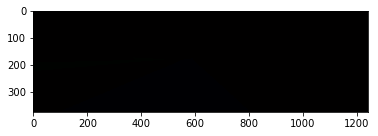

In [38]:
imagefile = './data_road/training/gt_image_2/um_road_000001.png'
image = scipy.misc.imread(imagefile)
#img2 = data_normalization(img)
#plt.imshow(img2, cmap='gray')
gt_bg = image.copy()
gt_bg2 = image.copy()
gt_bg3 = image.copy()
width = len(image[0, :, 0])
height = len(image[:, 0, 0])

for x in range(height):
    for y in range(width):
        r = image[x, y, 0];
        g = image[x, y, 1];
        b = image[x, y, 2];
        if r == 255 and b == 0:
            gt_bg[x, y, 0] = 1
            gt_bg[x, y, 1] = 0
            gt_bg[x, y, 2] = 0
        elif r == 0 and b == 0:
            gt_bg[x, y, 0] = 0
            gt_bg[x, y, 1] = 2
            gt_bg[x, y, 2] = 0
        elif b == 255:
            gt_bg[x, y, 0] = 0
            gt_bg[x, y, 1] = 0
            gt_bg[x, y, 2] = 3
            
plt.imshow(gt_bg)

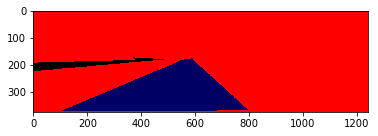

In [32]:
plt.imshow(gt_bg2)

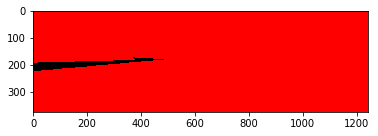

In [42]:
r_ch = img.copy()
r_ch[:, :, 1] = 0
r_ch[:, :, 2] = 0
plt.imshow(r_ch, cmap='gray')

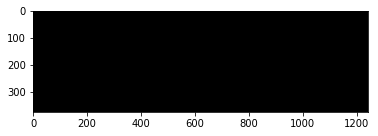

In [43]:
g_ch = img.copy()
g_ch[:, :, 0] = 0
g_ch[:, :, 2] = 0
plt.imshow(g_ch, cmap='gray')

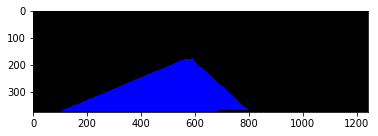

In [44]:
b_ch = img.copy()
b_ch[:, :, 0] = 0
b_ch[:, :, 1] = 0
plt.imshow(b_ch, cmap='gray')

In [45]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [46]:
# bot_left   = [250, 320]
# bot_right  = [750, 320]
# apex_right = [610, 200]
# apex_left  = [550, 190]
# v = [np.array([bot_left, bot_right, apex_right, apex_left], dtype=np.int32)]

# mask = region_of_interest(img, v)
# np.set_printoptions(threshold=np.nan)
# mask[0:100, 0:100, 0]

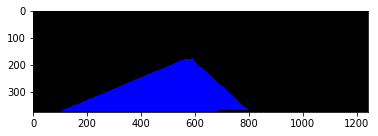

In [47]:
plt.imshow(b_ch, cmap='gray')

(375, 1242, 3)

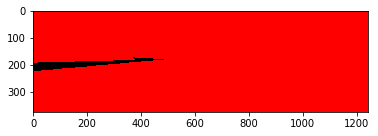

In [48]:
img_c = r_ch.copy()
plt.imshow(img_c)
img_c.shape

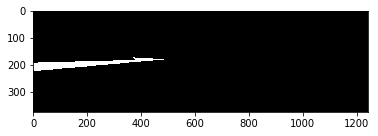

In [49]:
img_c2 = img_c.copy()
mask = np.array([0, 0, 0])
img_c2 = np.all(img_c2 == mask, axis=2)
plt.imshow(img_c2,cmap=plt.cm.gray)

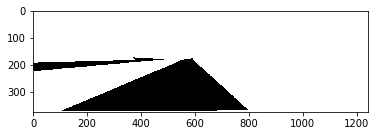

In [50]:
'''
Get the background
'''

# make a copy of the input image
bkg = img.copy()

# create a mask in order to select only red pixels
background_color = np.array([255, 0, 0])

#apply the mask
img_c2 = np.all(bkg == background_color, axis=2)
                
plt.imshow(img_c2, cmap=plt.cm.gray)

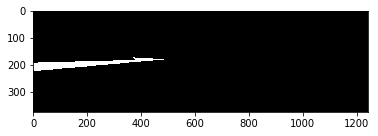

In [51]:
'''
Get the balck road
'''

# make a copy of the input image
r_ch = img.copy()

# set to zero all color channels but the red one
r_ch[:, :, 1] = 0
r_ch[:, :, 2] = 0

# apply mask in order to select only the balck pixels from the background image
mask = np.array([0, 0, 0])
img_c2 = np.all(r_ch == mask, axis=2)
plt.imshow(img_c2, cmap=plt.cm.gray)

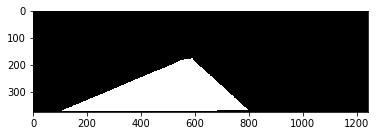

In [52]:
'''
Get the main road
'''

# make a copy of the input image
b_ch = img.copy()

# set to zero all color channels but the blue one
b_ch[:, :, 0] = 0
b_ch[:, :, 1] = 0

# apply mask in order to select only the blue pixels from the image
mask = np.array([0, 0, 255])
img_c2 = np.all(b_ch == mask, axis=2)

plt.imshow(img_c2, cmap=plt.cm.gray)

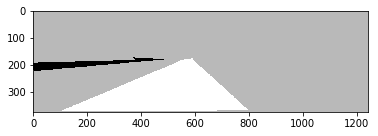

In [26]:
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_norm = data_normalization(img_grey)
plt.imshow(img_norm, cmap='gray')

array([[-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078],
       [-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078],
       [-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078],
       ..., 
       [-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078],
       [-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078],
       [-0.20196078, -0.20196078, -0.20196078, ..., -0.20196078,
        -0.20196078, -0.20196078]])

In [56]:
for i,j in img[:,:,2]:
    print('{} + {}'.format(i, j))

ValueError: too many values to unpack (expected 2)

In [5]:
for x,y in img:
    r,g,b = img.getpixel((x,y))
    if b < g and b < r or r==g==b:
        out.putpixel((x,y), 0)

ValueError: too many values to unpack (expected 2)

In [6]:
width = len(img[0,:,0])
height = len(img[:,0,0])

for x in range(width):
    for y in range(height):
        r,g,b = im.getpixel((x,y))
        if r != 255:
            print('{} + {} + {}'.format(r, g, b))
#         if b < g and b < r or r==g==b:
#             out.putpixel((x,y), 0)

NameError: name 'im' is not defined

In [99]:
width

1242

In [100]:
height

375